In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# make plots look clean
plt.style.use("seaborn-v0_8")


In [10]:
df = pd.read_csv("cleaned_it_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1


In [11]:
df.shape


(8469, 19)

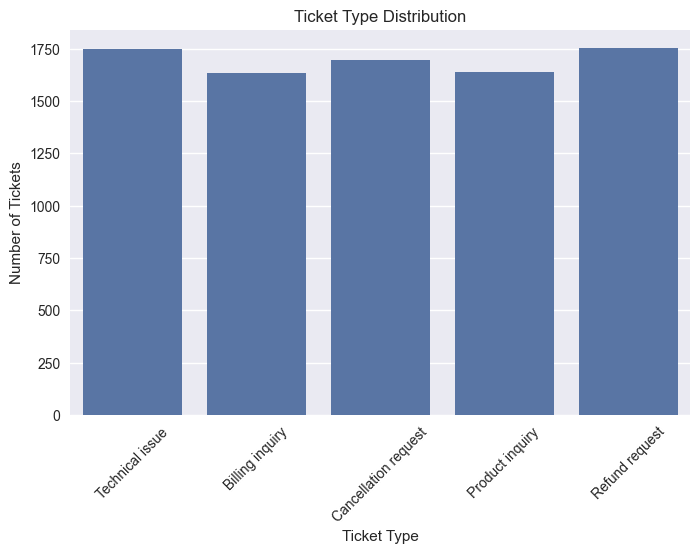

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Ticket Type")
plt.title("Ticket Type Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()


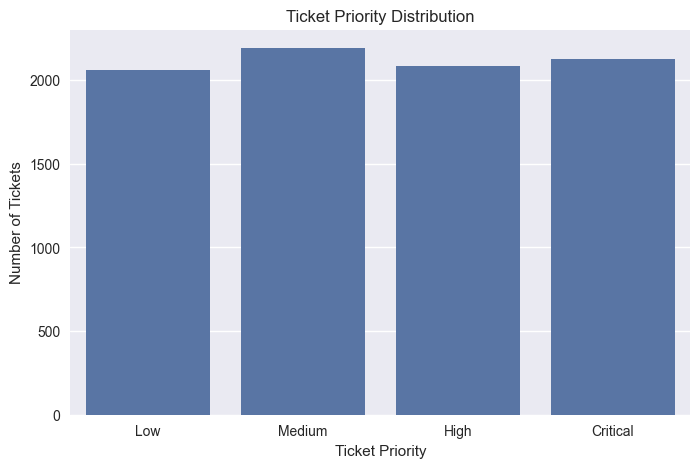

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Ticket Priority", order=["Low", "Medium", "High", "Critical"])
plt.title("Ticket Priority Distribution")
plt.xlabel("Ticket Priority")
plt.ylabel("Number of Tickets")
plt.show()


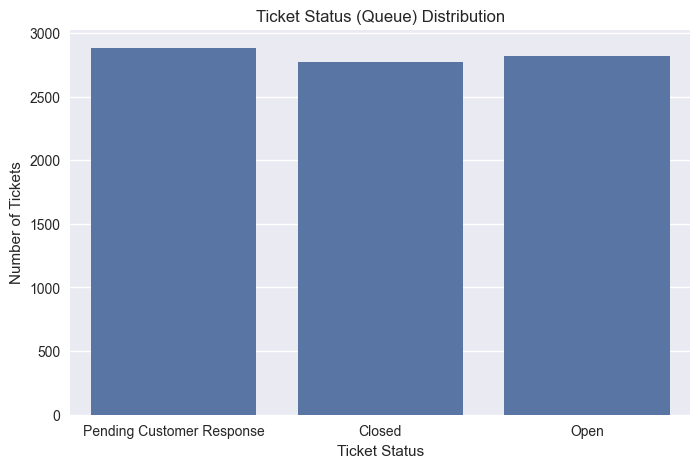

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Ticket Status")
plt.title("Ticket Status (Queue) Distribution")
plt.xlabel("Ticket Status")
plt.ylabel("Number of Tickets")
plt.show()


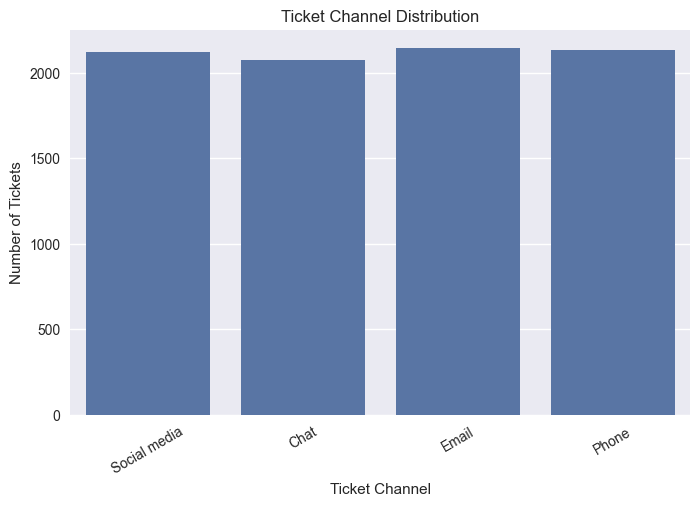

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Ticket Channel")
plt.title("Ticket Channel Distribution")
plt.xlabel("Ticket Channel")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)
plt.show()


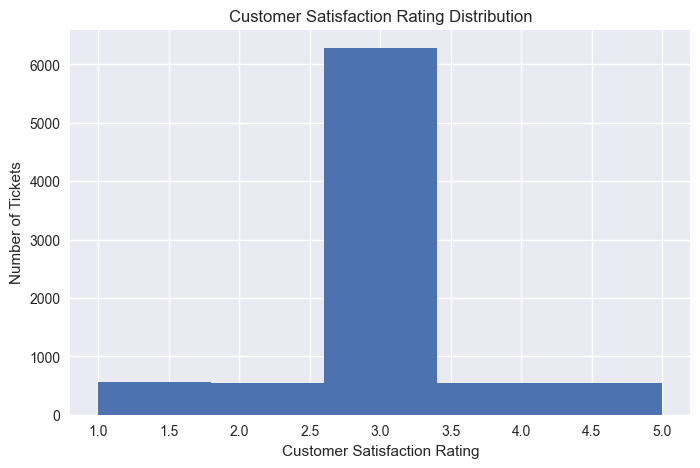

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df["Customer Satisfaction Rating"], bins=5)
plt.title("Customer Satisfaction Rating Distribution")
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Number of Tickets")
plt.show()


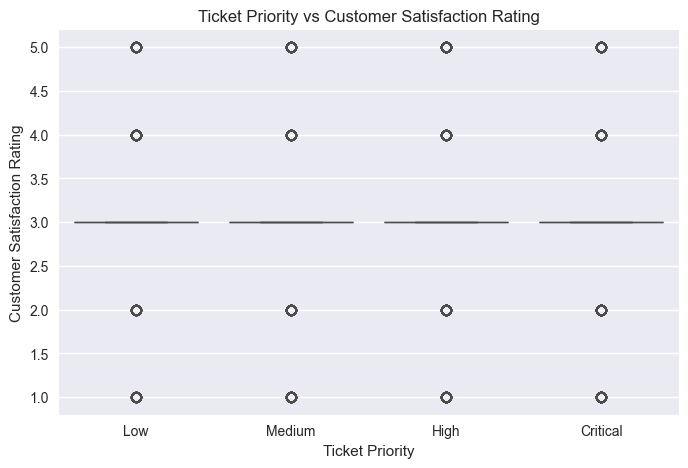

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Ticket Priority", y="Customer Satisfaction Rating",
            order=["Low", "Medium", "High", "Critical"])
plt.title("Ticket Priority vs Customer Satisfaction Rating")
plt.xlabel("Ticket Priority")
plt.ylabel("Customer Satisfaction Rating")
plt.show()


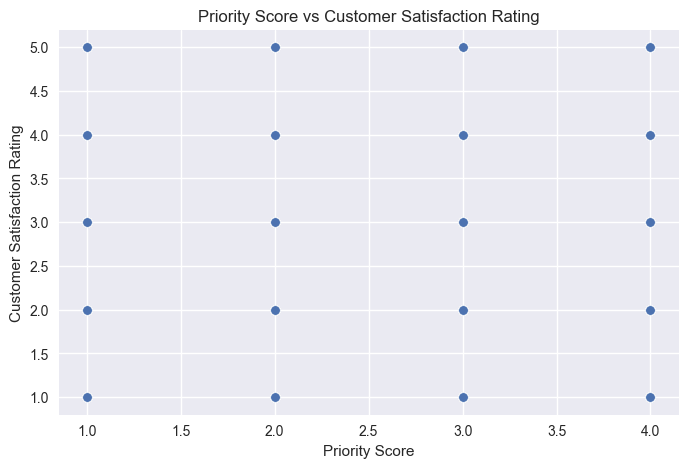

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Priority_Score",
    y="Customer Satisfaction Rating"
)
plt.title("Priority Score vs Customer Satisfaction Rating")
plt.xlabel("Priority Score")
plt.ylabel("Customer Satisfaction Rating")
plt.show()


In [25]:
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], errors="coerce")
df["First Response Time"] = pd.to_datetime(df["First Response Time"], errors="coerce")

df["Resolution_Time_Hours"] = (
    df["Time to Resolution"] - df["First Response Time"]
).dt.total_seconds() / 3600


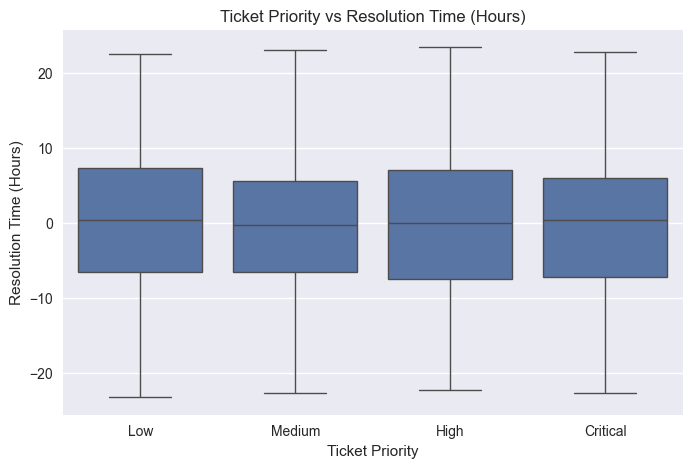

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Ticket Priority",
    y="Resolution_Time_Hours",
    order=["Low", "Medium", "High", "Critical"]
)
plt.title("Ticket Priority vs Resolution Time (Hours)")
plt.xlabel("Ticket Priority")
plt.ylabel("Resolution Time (Hours)")
plt.show()
